<a href="https://colab.research.google.com/github/Leena-GO/Self-study/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%2B_%EB%94%A5%EB%9F%AC%EB%8B%9D_04_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04-1 로지스틱 회귀

## 1. 럭키백의 확률

In [43]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [44]:
#생선 종류 유니크값 확인
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [45]:
#Species 열을 타깃 데이터로 만들고, 나머지 열은 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() #numpy 배열로 변경해준다.
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [46]:
#타깃 데이터 만들기
fish_target = fish['Species'].to_numpy()

In [47]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [48]:
#train set과 test set 만들기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [49]:
# 훈련 세트와 테스트 세트를 표준화 전처리 해주기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) #훈련 세트의 통계 값으로 테스트 세트 변환 필요

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 필요 데이터가 모두 정리되었으니,  k-최근접 이웃 분류기로 테스트 세트에 들어있는 확률을 예측해본다.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3) #기본값은 5
kn.fit(train_scaled, train_target) #train data로 한번 학습시키기
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 앞서 보았던 fish['Species']에는 7가지 종류의 생선이 있었는데, 훈련 세트와 테스트 세트에도 7개의 생선 종류가 들어가 있다.
- 이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류**(Multiclass classification)이라고 한다.

- 2장에서 만들었던 이진 분류는, 양성 클래스와 음성 클래스를 1과 0으로 구성해야 했는데, 사이킷런은 문자열로 된 타깃값을 그대로 사용할 수 있다.
  - 주의: 타깃값을 그대로 사이킷런 모델에 전달하면, 순서가 **자동으로 알파벳 순**이 된다.
  - KNeighborsClassifier에 정렬된 타깃값은 **classes_** 속성에 있다.

In [51]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [52]:
#predict() 메서드는 타깃값으로 예측을 출력한다
kn.predict(test_scaled[:5]) #테스트 세트에 있는 처음 5개 샘플의 타깃값 예측

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [53]:
#예측하고자 했던 input값, predict를 통해 target값을 보여준다!
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

- 위 5개 샘플에 대한 예측은 어떤 확률로 만들어진걸까?

- 사이킷런의 분류 모델은 **predict_proba()** 메서드로 **클래스별 확률값**을 반환한다.

- numpy의 **round()함수**는 기본으로 소수점 첫째 자리에서 반올림을 하는데, **decimals** 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.

In [54]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

- *predict_proba()* 메서드의 출력 순서는 *classes_* 속성과 같다. 

  - [Bream  , Parkki, Perch , Pike  , Roach , Smelt, Whitefish] 순


---

- 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해보자.
  - 4번째 샘플의 최근접 이웃의 클래스를 확인

In [55]:
distance, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

- [0.    , 0.    , *0.6667* , 0.    , *0.3333*, 0.    , 0.    ]
  - 5번째 클래스인 'Roach'가 1개, 3번째 클래스인 'Perch'가 2개 나왔다.
  - 그러므로 [Roach = 1/3 = 0.333], [Perch = 2/3 = 0.6667]이 맞게 된다!



---

- 위에서 *n_neighbors = 3*으로 지정했기 때문에, 가능한 확률은 0/3, 1/3, 2/3, 3/3뿐이다.
- 더 좋은 방법은?!

## 2. 로지스틱 회귀(Logistic Regression)
- 로지스틱 회귀는, 이름이 회귀이지만 분류 모델이다.

- 선형 회귀와 동일하게 선형 방정식을 학습한다.

  - z = [{a x (Weight)} + {b x (Length)} + {c x (Diagonal)} + {d x (Height)} + {e x (Width)} + f]

    - z는 어떠한 값도 가능하다.

    - 확률이 되려면 0 ~ 1 사이에 있어야 하므로, z가 아주 큰 음수일 경우 0, z가 아주 큰 양수일 때 1이 되도록 바꿔줘야 한다.

    - 이를 할 수 있는 것이 **시그모이드 함수**(sigmoid function) 혹은 **로지스틱 함수**(logistic function) 이다.

![image.png](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5152157%2F366ce717ad74dfe967a940d9a2161f9b%2Fmain-qimg-6b67bea3311c3429bfb34b6b1737fe0c.jpg?generation=1605711218576073&alt=media)

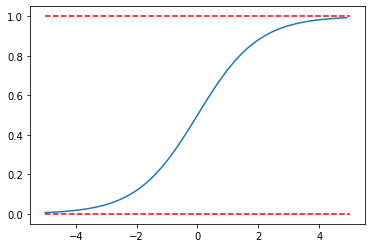

In [56]:
#numpy를 이용하여 시그모이드 그래프 그리기
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot([-5, 5], [1,1], 'r--')
plt.plot([-5, 5], [0,0], 'r--')

plt.plot(z, phi)
plt.show()

- 훈련 전, 도미와 빙어 데이터로 이진 분류를 먼저 해보자.

In [57]:
chart = np.array(['A','B','C','D','E'])
chart[[True, True, False, True, False]] #True인 값만 전달

array(['A', 'B', 'D'], dtype='<U1')

In [58]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [59]:
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [60]:
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#훈련 모델을 사용하여 train_bream_smelt에 있는 처음 5개 샘플 예측

lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [67]:
print('음성       ' + '  /  ' + '    양성')
print(lr.predict_proba(train_bream_smelt[:5]))

음성         /      양성
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- 첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률이다.
- 과연 어떤 것이 양성 클래스인지는 **classes_**를 사용하면 알 수 있다.

In [64]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

- 음성 클래스는 도미(Bream), 양성 클래스는 빙어(Smelt)이다.


---
- 로지스틱 회귀가 학습한 계수를 알아보자.


In [68]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.
  - z = [{-0.404 x (Weight)} + {-0.576 x (Length)} + {-0.663 x (Diagonal)} + {-1.013 x (Height)} + {-0.731 x (Width)} + -2.161]

- LogisticRegression 모델에서, **decision_function()**메서드로 z값을 계산할 수 있다.

In [70]:
#처음 5개 샘플의 z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

- 위에서 추출된 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
  - 파이썬의 **scipy** 라이브러리에서 시그모이드 함수인 **expit()**을 사용하면 된다.
  - np.exp()를 가지고 직접 계산하는 것보다 편리하다.

In [75]:
from scipy.special import expit

print('expit:' + str(expit(decisions)))
print('\n')
print('predict_proba: ' +str(lr.predict_proba(train_bream_smelt[1:2])))

expit:[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


predict_proba: [[0.02735183 0.97264817]]


- 위에서 출력된 값을 보면, predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다.
- 이를 통해, decision_function() 메서드는 양성 클래스에 대한 z값을 반환하는 것을 알 수 있다.


---

- 정리 (*이진 분류*)
  - 1) 이진 분류를 위해 2개의 생선 샘플을 골라냈고, 이를 이용하여 로지스틱 회귀 모델을 훈련했다.
  - 2) 이진 분류의 경우, predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다.
  - 3) decision_function() 메서드는 양성 클래스에 대한 z값을 계산한다.
  - 4) 'coef_' 속성과 'intercept_' 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수들이 존재한다.



---

- 이젠 다중 분류를 해보며 이진 분류와의 차이점을 살펴보자.

In [77]:
lr = LogisticRegression(C = 20, max_iter = 1000)

#C: LogisticRegression에서 규제를 제어하는 매개변수, 작을수록 규제가 커진다.
#max_iter: 반복 횟수 지정, default = 100, 준비한 데이터셋을 사용하여 모델을 훈련하면 반복 횟수가 부족하다는 경고가 뜬다.

lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [79]:
#테스트 세트 예측을 출력해보자
lr.predict(test_scaled)

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Perch', 'Pike', 'Bream',
       'Perch', 'Roach', 'Roach', 'Parkki', 'Perch'], dtype=object)

In [80]:
proba = lr.predict_proba(test_scaled)
np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.001, 0.05 , 0.   , 0.004, 0.945, 0.   ],
       [0.001, 0.007, 0.32 , 0.015, 0.638, 0.001, 0.018],
       [0.   , 0.002, 0.802, 0.002, 0.182, 0.   , 0.011],
       [0.   , 0.   , 0.023, 0.977, 0.   , 0.   , 0.   ],
       [0.984, 0.003, 0.   , 0.   , 0.001, 0.   , 0.013],
       [0.047, 0.   , 0.816, 0.008, 0.002, 0.   , 0.127],
       [0.992, 0.005, 0.   , 0.   , 0.   , 0.   , 0.003],
       [0.007, 0.907, 0.002, 0.   , 0.075, 0.   , 0.009],
       [0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.001, 0.   , 0.935, 0.   , 0.   , 0.   , 0.063],
       [0.001,